In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from sklearn import datasets

In [229]:
books = "output/combined_book.csv"
books_df = pd.read_csv(books)
books_df.head()

,rank,primary_isbn13,publisher,title,author,category,pub_date,Amazon Product ID,Amazon Rating,Amazon Rating Total,Amazon Price
0,11,9781982168018,Gallery,TASTE,Stanley Tucci,Hardcover Nonfiction,2022-02-06,1982168013,4.7,3118.0,14.00
1,8,9780062888341,Harper,THE STRANGER IN THE LIFEBOAT,Mitch Albom,Hardcover Fiction,2022-02-06,006288834X,4.6,9966.0,15.07
2,10,9780385547932,Doubleday,TO PARADISE,Hanya Yanagihara,Hardcover Fiction,2022-02-06,B091XWH5T2,4.2,204.0,14.99
3,11,9780593465066,Viking,CALL US WHAT WE CARRY,Amanda Gorman,Hardcover Fiction,2022-02-06,0593465067,4.9,1794.0,14.53
4,12,9781982168438,Scribner,CLOUD CUCKOO LAND,Anthony Doerr,Hardcover Fiction,2022-02-06,B08TRMSR3Z,4.5,8792.0,15.99


In [230]:
books_df.columns

Index(['rank', 'primary_isbn13', 'publisher', 'title', 'author', 'category',
       'pub_date', 'Amazon Product ID', 'Amazon Rating', 'Amazon Rating Total',
       'Amazon Price'],
      dtype='object')

In [231]:
books_df.columns = ['NYT Ranking', 'ISBN', 'Publisher', 'Title', 'Author', 'Book Category',
       'NYT Pub Date', 'Amazon Product ID',  'Amazon Rating Total','Num of Amz Ratings',
       'Amazon Price']
books_df

,NYT Ranking,ISBN,Publisher,Title,Author,Book Category,NYT Pub Date,Amazon Product ID,Amazon Rating Total,Num of Amz Ratings,Amazon Price
0,11,9781982168018,Gallery,TASTE,Stanley Tucci,Hardcover Nonfiction,2022-02-06,1982168013,4.7,3118.0,14.00
1,8,9780062888341,Harper,THE STRANGER IN THE LIFEBOAT,Mitch Albom,Hardcover Fiction,2022-02-06,006288834X,4.6,9966.0,15.07
2,10,9780385547932,Doubleday,TO PARADISE,Hanya Yanagihara,Hardcover Fiction,2022-02-06,B091XWH5T2,4.2,204.0,14.99
3,11,9780593465066,Viking,CALL US WHAT WE CARRY,Amanda Gorman,Hardcover Fiction,2022-02-06,0593465067,4.9,1794.0,14.53
4,12,9781982168438,Scribner,CLOUD CUCKOO LAND,Anthony Doerr,Hardcover Fiction,2022-02-06,B08TRMSR3Z,4.5,8792.0,15.99
...,...,...,...,...,...,...,...,...,...,...,...
1232,18,9780312547745,St. Martin's Press,"THE WALKING DEAD, RISE OF THE GOVERNOR",Robert Kirkman and Jay Bonansinga,Combined Print Fiction,2012-11-04,B009RFHNB8,4.5,930.0,0.00
1233,15,9780399157707,Penguin Group,MAD RIVER,John Sandford,Combined Print Fiction,2012-11-04,B0085DP6EY,4.6,3011.0,9.99
1234,12,9781439152805,Atria Books,THE SECRET KEEPER,Kate Morton,Combined Print Fiction,2012-11-04,B009R5Q51W,4.5,7219.0,0.00
1235,2,9780345504982,Random House Publishing,THE TWELVE,Justin Cronin,Combined Print Fiction,2012-11-04,B009RFGP8K,4.5,4496.0,0.00


In [232]:
data_new1 = books_df.copy()                              
data_new1 = data_new1.replace(r'^s*$', float('NaN'), regex = True)  
data_new1_df = pd.DataFrame(data_new1)
data_new1_df

,NYT Ranking,ISBN,Publisher,Title,Author,Book Category,NYT Pub Date,Amazon Product ID,Amazon Rating Total,Num of Amz Ratings,Amazon Price
0,11,9781982168018,Gallery,TASTE,Stanley Tucci,Hardcover Nonfiction,2022-02-06,1982168013,4.7,3118.0,14.00
1,8,9780062888341,Harper,THE STRANGER IN THE LIFEBOAT,Mitch Albom,Hardcover Fiction,2022-02-06,006288834X,4.6,9966.0,15.07
2,10,9780385547932,Doubleday,TO PARADISE,Hanya Yanagihara,Hardcover Fiction,2022-02-06,B091XWH5T2,4.2,204.0,14.99
3,11,9780593465066,Viking,CALL US WHAT WE CARRY,Amanda Gorman,Hardcover Fiction,2022-02-06,0593465067,4.9,1794.0,14.53
4,12,9781982168438,Scribner,CLOUD CUCKOO LAND,Anthony Doerr,Hardcover Fiction,2022-02-06,B08TRMSR3Z,4.5,8792.0,15.99
...,...,...,...,...,...,...,...,...,...,...,...
1232,18,9780312547745,St. Martin's Press,"THE WALKING DEAD, RISE OF THE GOVERNOR",Robert Kirkman and Jay Bonansinga,Combined Print Fiction,2012-11-04,B009RFHNB8,4.5,930.0,0.00
1233,15,9780399157707,Penguin Group,MAD RIVER,John Sandford,Combined Print Fiction,2012-11-04,B0085DP6EY,4.6,3011.0,9.99
1234,12,9781439152805,Atria Books,THE SECRET KEEPER,Kate Morton,Combined Print Fiction,2012-11-04,B009R5Q51W,4.5,7219.0,0.00
1235,2,9780345504982,Random House Publishing,THE TWELVE,Justin Cronin,Combined Print Fiction,2012-11-04,B009RFGP8K,4.5,4496.0,0.00


In [233]:
data_new2 = data_new1.copy()                          
data_new2.dropna(inplace = True)                     
data_new2_df = pd.DataFrame(data_new2)
data_new2_df

,NYT Ranking,ISBN,Publisher,Title,Author,Book Category,NYT Pub Date,Amazon Product ID,Amazon Rating Total,Num of Amz Ratings,Amazon Price
0,11,9781982168018,Gallery,TASTE,Stanley Tucci,Hardcover Nonfiction,2022-02-06,1982168013,4.7,3118.0,14.00
1,8,9780062888341,Harper,THE STRANGER IN THE LIFEBOAT,Mitch Albom,Hardcover Fiction,2022-02-06,006288834X,4.6,9966.0,15.07
2,10,9780385547932,Doubleday,TO PARADISE,Hanya Yanagihara,Hardcover Fiction,2022-02-06,B091XWH5T2,4.2,204.0,14.99
3,11,9780593465066,Viking,CALL US WHAT WE CARRY,Amanda Gorman,Hardcover Fiction,2022-02-06,0593465067,4.9,1794.0,14.53
4,12,9781982168438,Scribner,CLOUD CUCKOO LAND,Anthony Doerr,Hardcover Fiction,2022-02-06,B08TRMSR3Z,4.5,8792.0,15.99
...,...,...,...,...,...,...,...,...,...,...,...
1232,18,9780312547745,St. Martin's Press,"THE WALKING DEAD, RISE OF THE GOVERNOR",Robert Kirkman and Jay Bonansinga,Combined Print Fiction,2012-11-04,B009RFHNB8,4.5,930.0,0.00
1233,15,9780399157707,Penguin Group,MAD RIVER,John Sandford,Combined Print Fiction,2012-11-04,B0085DP6EY,4.6,3011.0,9.99
1234,12,9781439152805,Atria Books,THE SECRET KEEPER,Kate Morton,Combined Print Fiction,2012-11-04,B009R5Q51W,4.5,7219.0,0.00
1235,2,9780345504982,Random House Publishing,THE TWELVE,Justin Cronin,Combined Print Fiction,2012-11-04,B009RFGP8K,4.5,4496.0,0.00


In [234]:
total_ranks_NYT =data_new2_df["NYT Ranking"].value_counts()
x_axis= np.arange(len(total_ranks_NYT))

In [235]:
total_ranks_NYT

14    90
15    78
12    64
10    62
11    59
13    58
8     56
9     45
6     42
7     42
20    31
3     31
18    30
5     28
16    28
17    27
19    26
2     23
4     23
1     17
Name: NYT Ranking, dtype: int64

In [236]:
total_ratings_AMZ =data_new2_df["Num of Amz Ratings"].value_counts()
x_axis= np.arange(len(total_ratings_AMZ))

In [237]:
total_ratings_AMZ

18.0       6
2.0        4
1295.0     3
838.0      3
1198.0     3
          ..
763.0      1
25620.0    1
13013.0    1
7219.0     1
23204.0    1
Name: Num of Amz Ratings, Length: 765, dtype: int64

In [238]:
data_new2_df.columns

Index(['NYT Ranking', 'ISBN', 'Publisher', 'Title', 'Author', 'Book Category',
       'NYT Pub Date', 'Amazon Product ID', 'Amazon Rating Total',
       'Num of Amz Ratings', 'Amazon Price'],
      dtype='object')

In [239]:
#Top Rating Books and Authors 
top_authors = data_new2.groupby(["Book Category", "Title", "Author"])
top_authors.count()

top_group_count = top_authors["Num of Amz Ratings"].max()


top_df = pd.DataFrame(top_group_count)

top_df.sort_values(by="Num of Amz Ratings", ascending=False)


Num of Amz Ratings
Book Category             Title                     Author                                               
Hardcover Fiction         THE MIDNIGHT LIBRARY      Matt Haig                                    132607.0
                          THE FOUR WINDS            Kristin Hannah                                90123.0
E-Book Fiction            THE GIRL ON THE TRAIN     Paula Hawkins                                 87948.0
Hardcover Fiction         THE LAST THING HE TOLD ME Laura Dave                                    67771.0
E-Book Fiction            THE ALCHEMIST             Paulo Coelho                                  67078.0
...                                                                                                   ...
Hardcover Fiction         ROCK PAPER SCISSORS       Alice Feeney                                     10.0
Combined Print Nonfiction LEAN IN                   Sheryl Sandberg with Nell Scovell                 2.0
Hardcover Nonfiction      PERIL                     Bob Woodward and Robert Costa                     2.0
Hardcover Fiction         PROJECT HAIL MARY         Andy Weir                                         2.0
Hardcover Nonfiction      THE BOMBER MAFIA          Malcolm Gladwell                                  1.0

[812 rows x 1 columns]

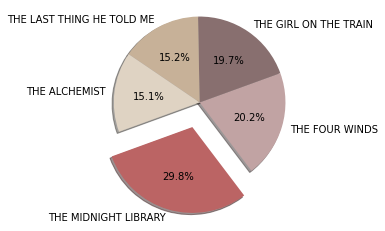

In [240]:
categories = ["THE MIDNIGHT LIBRARY", "THE FOUR WINDS", "THE GIRL ON THE TRAIN", "THE LAST THING HE TOLD ME","THE ALCHEMIST"]
totals = [132607,90123,87948,67771,67078]
colors = ["#BB6464","#C1A3A3","#886F6F","#C7B198","#DFD3C3",]
explode = (0.3,0,0,0,0,)


plt.pie(totals, explode=explode, labels=categories, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

plt.axis("equal")


plt.show()

In [241]:
price_rating_col = data_new2.loc[:,['Book Category','Num of Amz Ratings','Amazon Price']]
price_rating_col

,Book Category,Num of Amz Ratings,Amazon Price
0,Hardcover Nonfiction,3118.0,14.00
1,Hardcover Fiction,9966.0,15.07
2,Hardcover Fiction,204.0,14.99
3,Hardcover Fiction,1794.0,14.53
4,Hardcover Fiction,8792.0,15.99
...,...,...,...
1232,Combined Print Fiction,930.0,0.00
1233,Combined Print Fiction,3011.0,9.99
1234,Combined Print Fiction,7219.0,0.00
1235,Combined Print Fiction,4496.0,0.00


In [286]:
# Getting the Price Average by Category 
book_group = price_rating_col.groupby("Book Category")

avg_price = book_group["Amazon Price"].mean()
#avg_rating = book_group["Amazon Rating Total"].mean()

price_and_rating = pd.DataFrame({
    "Price Average": avg_price,
    #"Rating Average": avg_rating
})
#price_vs_rating.index.name= None
price_vs_rating

,Price Average
Book Category,
Audio Fiction,11.960000
Audio Nonfiction,0.000000
Combined Print Fiction,7.719464
Combined Print Nonfiction,10.554640
E-Book Fiction,6.935802
E-Book Nonfiction,7.130423
Hardcover Fiction,13.254592
Hardcover Nonfiction,15.727636


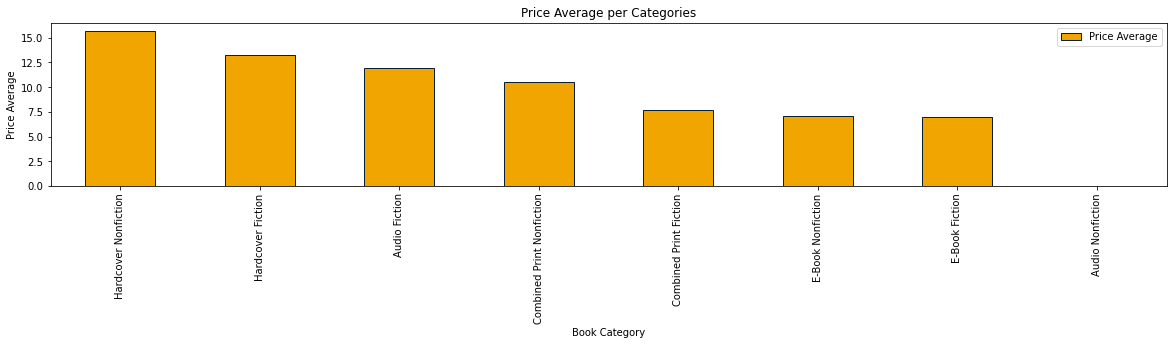

<Figure size 432x288 with 0 Axes>

In [287]:
# Price Average per Categories 
price_and_rating.sort_values(by="Price Average", ascending=False).plot(kind="bar", figsize=(20,3), facecolor='#F0A500',edgecolor='#082032')

# Set a title for the chart
plt.title("Price Average per Categories")
plt.ylabel('Price Average')
plt.show()
plt.tight_layout()

In [289]:
# Getting the Rating Average by Category 
book_group = price_rating_col.groupby("Book Category")

#avg_price = book_group["Amazon Price"].mean()
avg_rating = book_group["Num of Amz Ratings"].mean()

price_and_rating = pd.DataFrame({
    #"Price Average": avg_price,
    "Rating Average": avg_rating
})
#price_vs_rating.index.name= None
price_and_rating

,Rating Average
Book Category,
Audio Fiction,24740.000000
Audio Nonfiction,8828.000000
Combined Print Fiction,6193.327381
Combined Print Nonfiction,3419.984000
E-Book Fiction,5397.056604
E-Book Nonfiction,2956.690141
Hardcover Fiction,10675.836735
Hardcover Nonfiction,4232.472727


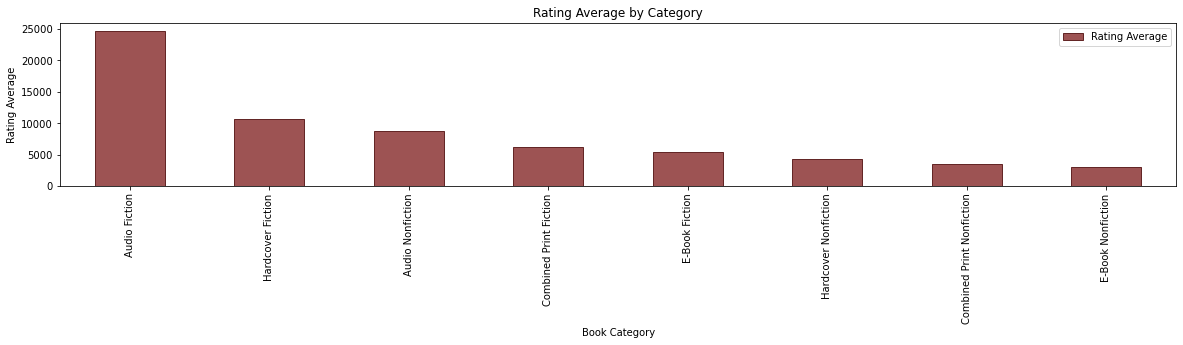

<Figure size 432x288 with 0 Axes>

In [291]:
# Rating 
price_and_rating.sort_values(by="Rating Average", ascending=False).plot(kind="bar", figsize=(20,3), facecolor='#9D5353',edgecolor='#632626')

# Set a title for the chart
plt.title("Rating Average by Category")
plt.ylabel('Rating Average')
plt.show()
plt.tight_layout()

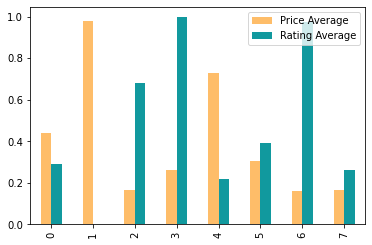

In [292]:
#Price vs. Rating 

price_and_rating_P = pd.DataFrame(np.random.rand(8, 2), columns=["Price Average", "Rating Average"])
#plt.xticks(tick_locations,price_vs_rating["Book Category"], totation="vertical" )
price_vs_rating_P.plot.bar();



In [245]:
total_categories =price_rating_col["Book Category"].value_counts()
x_axis= np.arange(len(total_categories))

In [246]:
total_categories

E-Book Fiction               212
Combined Print Fiction       168
E-Book Nonfiction            142
Combined Print Nonfiction    125
Hardcover Nonfiction         110
Hardcover Fiction             98
Audio Fiction                  4
Audio Nonfiction               1
Name: Book Category, dtype: int64

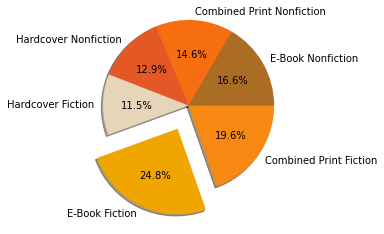

In [247]:
# Rating Average per Category 
categories = ["E-Book Fiction", "Combined Print Fiction", "E-Book Nonfiction", "Combined Print Nonfiction","Hardcover Nonfiction","Hardcover Fiction"]
totals = [212,168,142,125,110,98]
colors = ["#F0A500","#F78812","#AB6D23","#F76E11","#E45826","#E6D5B8"]
explode = (0.3,0,0,0,0,0)


plt.pie(totals, explode=explode, labels=categories, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

plt.axis("equal")


plt.show()

In [248]:
price_category = data_new2.loc[:,['Book Category','Amazon Price']]
price_category_df = pd.DataFrame(price_category)
price_category_df

,Book Category,Amazon Price
0,Hardcover Nonfiction,14.00
1,Hardcover Fiction,15.07
2,Hardcover Fiction,14.99
3,Hardcover Fiction,14.53
4,Hardcover Fiction,15.99
...,...,...
1232,Combined Print Fiction,0.00
1233,Combined Print Fiction,9.99
1234,Combined Print Fiction,0.00
1235,Combined Print Fiction,0.00


In [249]:
eight_categories = data_new2_df.groupby("Book Category")['Amazon Price'].mean().reset_index()
#top_authors.count()
#ISBN
#eight_categories = eight_categories["Book Category"].nunique()
#eight_categories = eight_categories['Amazon Price'].mean()


price_category_df = pd.DataFrame(eight_categories)
price_category_df

,Book Category,Amazon Price
0,Audio Fiction,11.960000
1,Audio Nonfiction,0.000000
2,Combined Print Fiction,7.719464
3,Combined Print Nonfiction,10.554640
4,E-Book Fiction,6.935802
5,E-Book Nonfiction,7.130423
6,Hardcover Fiction,13.254592
7,Hardcover Nonfiction,15.727636


In [250]:
data_new2_df.head()

,NYT Ranking,ISBN,Publisher,Title,Author,Book Category,NYT Pub Date,Amazon Product ID,Amazon Rating Total,Num of Amz Ratings,Amazon Price
0,11,9781982168018,Gallery,TASTE,Stanley Tucci,Hardcover Nonfiction,2022-02-06,1982168013,4.7,3118.0,14.00
1,8,9780062888341,Harper,THE STRANGER IN THE LIFEBOAT,Mitch Albom,Hardcover Fiction,2022-02-06,006288834X,4.6,9966.0,15.07
2,10,9780385547932,Doubleday,TO PARADISE,Hanya Yanagihara,Hardcover Fiction,2022-02-06,B091XWH5T2,4.2,204.0,14.99
3,11,9780593465066,Viking,CALL US WHAT WE CARRY,Amanda Gorman,Hardcover Fiction,2022-02-06,0593465067,4.9,1794.0,14.53
4,12,9781982168438,Scribner,CLOUD CUCKOO LAND,Anthony Doerr,Hardcover Fiction,2022-02-06,B08TRMSR3Z,4.5,8792.0,15.99


In [254]:
# Categories into a list for loop

all_categories = ["E-Book Fiction", "E-Book Nonfiction", "Combined Print Fiction","Combined Print Nonfiction","Hardcover Nonfiction","Hardcover Fiction", "Audio Fiction", "Audio Nonfiction"]


m_e_Book_Fiction =[]
m_e_book_nonfiction = []
m_combined_print_fiction = []
m_combined_print_nonfiction = []
m_hardcover_nonfiction = []
m_hardcover_fiction = []
m_audio_fiction = []
m_audio_nonfiction = []

for index, row in data_new2_df.iterrows():
    
    if row[1]== "E-Book Fiction":
        m_e_Book_Fiction.append(row[10])
    if row[1]== all_categories[1]:
        m_e_book_nonfiction.append(row[10])
    if row[1]== all_categories[2]:
        m_combined_print_fiction.append(row[10])
    if row[1]== all_categories[3]:
        m_combined_print_nonfiction.append(row[10])
    if row[1]== all_categories[4]:
        m_hardcover_nonfiction.append(row[10])
    if row[1]== all_categories[5]:
        m_hardcover_fiction.append(row[10])
    if row[1]== all_categories[6]:
        m_audio_fiction.append(row[10])
    if row[1]== all_categories[7]:
        m_audio_nonfiction.append(row[10])
    

all_categories_df = pd.DataFrame({
        "E-Book Fiction": m_e_Book_Fiction,
        "E-Book Nonfiction": m_e_book_nonfiction,
        "Combined Print Fiction": m_combined_print_fiction,
        "Combined Print Nonfiction": m_combined_print_nonfiction,
        "Hardcover Nonfiction": m_hardcover_nonfiction,
        "Hardcover Fiction": m_hardcover_fiction,
        "Audio Fiction": m_audio_fiction,
        "Audio Nonfiction": m_audio_nonfiction  
})

all_categories_df



,E-Book Fiction,E-Book Nonfiction,Combined Print Fiction,Combined Print Nonfiction,Hardcover Nonfiction,Hardcover Fiction,Audio Fiction,Audio Nonfiction


<AxesSubplot:title={'center':'Amazon Price'}, xlabel='Book Category'>

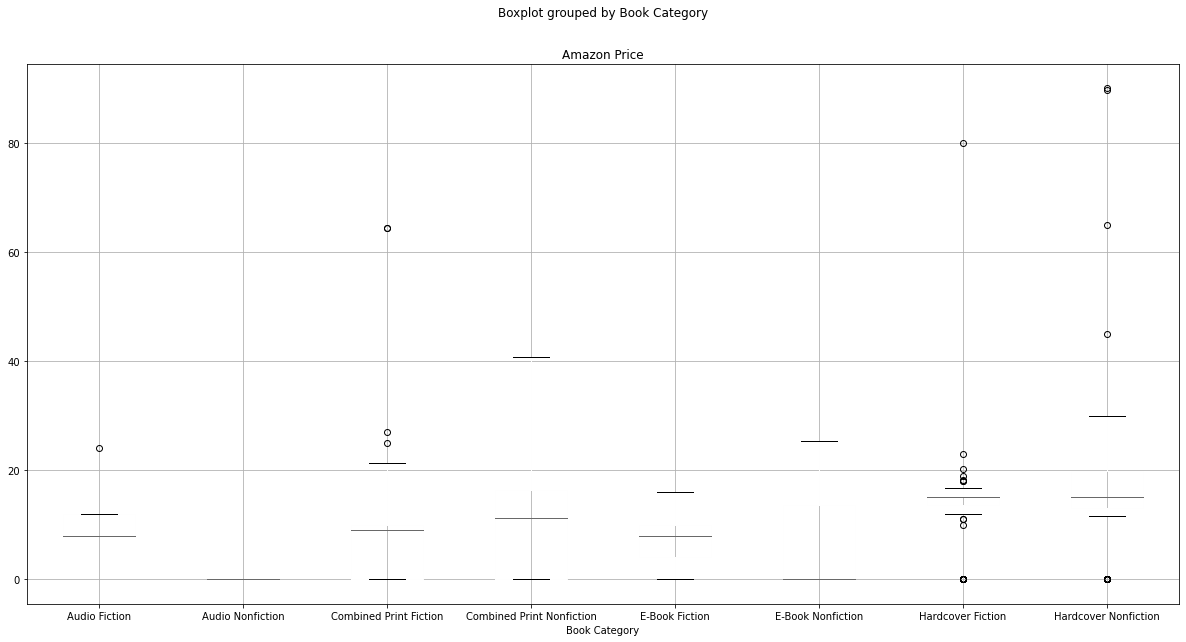

In [256]:
# Compartion of our 8 Book Categories 
#"E-Book Fiction", "Combined Print Fiction", "E-Book Nonfiction", \
#"Combined Print Nonfiction","Hardcover Nonfiction","Hardcover Fiction"]

data_new2_df.boxplot("Amazon Price", by="Book Category", figsize=(20, 10))


In [255]:
# Price Compartion of our 8 Book Categories
fig1, ax1 = plt.subplots()
ax1.set_title('Price Compartion by Category')
ax1.set_ylabel('Amazon Price')
ax1.boxplot(price_category_df)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8],["E-Book Fiction", "Combined Print Fiction", "E-Book Nonfiction","Combined Print Nonfiction","Hardcover Nonfiction","Hardcover Fiction"]
plt.show()

SyntaxError: invalid syntax (<ipython-input-255-59d15cd1a17e>, line 7)